In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline 

/Users/dc/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/dc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.1


In [3]:
boston_housing = keras.datasets.boston_housing

(x_train, y_train),(x_test,y_test) = boston_housing.load_data()

In [4]:
x_train, y_train = shuffle(x_train, y_train) #shuffling data

In [5]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [6]:
x_train.shape

(404, 13)

In [7]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
    ])

    optimizer = tf.train.RMSPropOptimizer(0.001)
    opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('.', end='')
    
    def on_train_begin(self, logs={}):
        print('train_strated')
 
    def on_train_end(self, logs={}):
        #print('')
        print('\ntrain_ended')

#https://keunwoochoi.wordpress.com/2016/07/16/keras-callbacks/

EPOCHS = 500

# Store training stats
history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])

train_strated
.....
train_ended


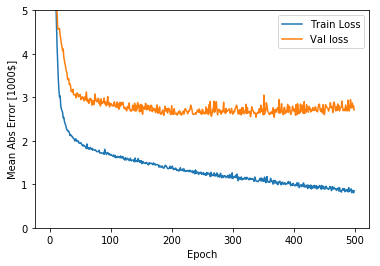

In [9]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)

In [10]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# def early_stop():
#     return keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
#     #pass

In [11]:
history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop,PrintDot()])

train_strated
.
train_ended


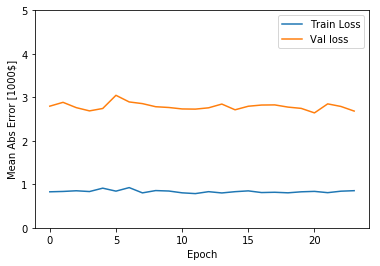

In [12]:

plot_history(history)

In [13]:
[loss, mae] = model.evaluate(x_test, y_test, verbose=0)

print("Testing set Mean Abs Error: ${:.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2518.17


In [14]:
test_predictions = model.predict(x_test)

In [21]:
test_predictions = test_predictions.flatten().shape

Text(0,0.5,'Predictions [1000$]')

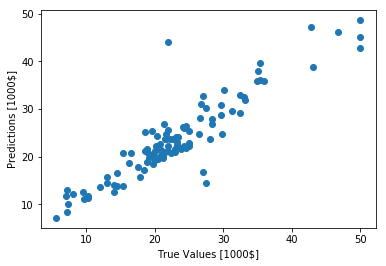

In [16]:
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')


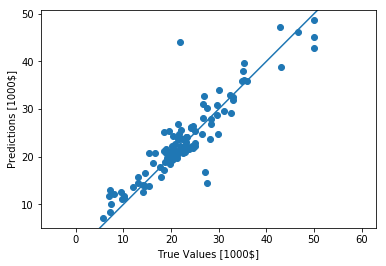

In [17]:
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

In [22]:
error = test_predictions - y_test

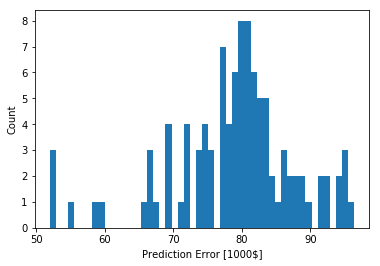

In [25]:
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
plt.ylabel("Count")
plt.show()